<a href="https://colab.research.google.com/github/mathieu-duverne/arbres_de_paris/blob/main/arbres_de_paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librairie utilisé :

    - matplotlib https://matplotlib.org/

    - seaborn  https://seaborn.pydata.org/

    - folium   https://python-visualization.github.io/folium/
    
    - pandas   https://pandas.pydata.org/docs/

    - numpy    https://numpy.org/

In [ ]:
% matplotlib inline
# !pip install folium
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pandas as pd
import numpy as np

# Nettoyage et mise en forme des données
  - avec la librairies **pandas** et **numpy**

  1 : Utilisation de la fonction **read_csv** afin de retourner un dataframe de mon csv 

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data-arbres-paris.csv', sep=';')
# len(df)

1.1 : Utilisation de la même fonction pour un nouveau dataframe de test

In [ ]:
test_df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/les-arbres.csv', sep=';')
# len(test_df)

TIPS : pour savoir quelles colonnes je vais récuperer ou pas je regarde le nombre de cellule null pour chaques colonnes 

In [ ]:
dataset_of_mean_per_colone_of_none_value = ( df.isnull().sum() / df.shape[0] ) *100
dataset_test_of_mean_per_colone_of_none_value = ( test_df.isnull().sum() / test_df.shape[0] ) * 100
# dataset_of_mean_per_colone_of_none_value

2 : Utilisation de la fonction **DataFrame** afin de récuperer uniquement les colonnes voulues

In [ ]:
data_filter = pd.DataFrame(df, columns=("id","arrondissement", "libelle_francais", "domanialite", "lieu", "genre", "geo_point_2d_a", "geo_point_2d_b", "circonference_cm", "hauteur_m"))
# data_filter.head(1)

2.2 : Utilisation de la même fonction au dessus pour le dataframe de test

In [ ]:
test_data_filter = pd.DataFrame(test_df, columns=("LIBELLE FRANCAIS", "DOMANIALITE", "GENRE", "ARRONDISSEMENT", "geo_point_2d", "CIRCONFERENCE (cm)", "HAUTEUR (m)"))
# test_data_filter.head(1)

3 : Utilisation de **boxplot** pour évaluer les données numérique éronnées 

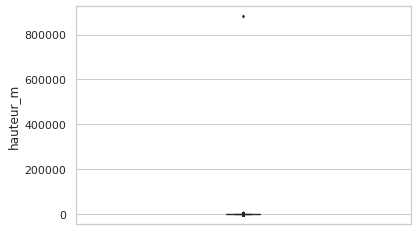

In [ ]:
sns.set_theme(style="whitegrid")

sns.boxplot(y=data_filter["hauteur_m"], data=data_filter, width=0.1, color=".25", linewidth=1.2, fliersize=2)

plt.savefig("boxplot_basic_hauteur_en_m_data.png")

3.1 : ré-utilisation de **boxplot** pour autres colonnes numérique 

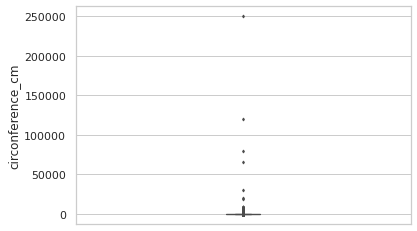

In [ ]:
sns.set_theme(style="whitegrid")

sns.boxplot(y=data_filter[ "circonference_cm" ], data=data_filter, width=0.1, linewidth=1.2, fliersize=2); 

plt.savefig("boxplot_basic_circonference_en_cm_data.png")

4 : Multiple condition de filtre numérique :

  - La circonference d'un abres ne dépasse pas 7 métre et n'est pas plus petit que 2 cm
  - La hauteur d'un abres est plus grand que 0 métre et plus petit que 1000 métres 

In [ ]:
data = data_filter[(data_filter["circonference_cm"] > 2)  & (data_filter["circonference_cm"] < 700)  & (data_filter["hauteur_m"] > 0) & (data_filter["hauteur_m"] < 1000)]
# len(data)

4.1 : Multiple condition de filtre numérique:
  - La circonference d'un abres ne dépasse pas 7 métre et n'est pas plus petit que 2 cm
  - La hauteur d'un abres est plus grand que 0 métre et plus petit que 1000 métres

In [ ]:
test_data = test_data_filter[(test_data_filter["CIRCONFERENCE (cm)"] > 2)  & (test_data_filter["CIRCONFERENCE (cm)"] < 700)  & (test_data_filter["HAUTEUR (m)"] > 0) & (test_data_filter["HAUTEUR (m)"] < 1000)]
# len(test_data)

TIPS : Pour savoir si nos colonnes non-numériques ont des valeurs associée dites *"logiques"*. On récupere grâce a la fonction **unique** chaques valeurs une fois.

6 : Utilisation de la fonction **unique()** pour récuperer chaques arrdt une fois

In [ ]:
unique_arrdt = data['arrondissement'].unique()
# unique_arrdt

6.1: Utilisation de la fonction **unique()** pour récuperer chaques dominialite une fois

In [ ]:
unique_domanialite = data['domanialite'].unique()
# unique_domanialite

6.2 : Utilisation de la fonction **unique()** pour récuperer chaques genre une fois

In [ ]:
unique_genre = data['libelle_francais'].unique()
# unique_genre

7 Utilisation de la fonction **fillna(*valeur remplacé*)** pour remplacer toutes les valeurs *Nan*
 - dans notre cas *valeur remplacé* == **non spécifié**

In [ ]:
data['domanialite'] = data['domanialite'].fillna("non spécifié")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


8 : Trie du dataframe par arrdt via la fonction **sort_values** 

In [ ]:
data_sort_by_arrdt = data.sort_values(by=["arrondissement"])
# data_sort_by_arrdt

8.1 : Trie du dataframe par arrdt via la fonction **sort_values** 

In [ ]:
data_sort_by_domanialite = data.sort_values(by=["domanialite"], ascending=True)
# data_sort_by_domanialite

9 : Utilisation de la fonction **pivot_table** compte le nombre d'arbres par arrondissement


In [ ]:
count_tree_by_arrdt = data.pivot_table(columns=['arrondissement'], aggfunc='size')
# count_tree_by_arrdt

9.1 : Utilisation de la fonction **pivot_table** compte le nombre d'arbres par arrondissement


In [ ]:
count_tree_by_domanialite = data.pivot_table(columns=['domanialite'], aggfunc='size')
# count_tree_by_domanialite

9.1 : Utilisation de la fonction **pivot_table** compte le nombre de genre dans le DataFrame

In [ ]:
tree_count_by_genre = data.pivot_table(columns=['libelle_francais'], aggfunc='size')
# tree_count_by_genre

9.2 : Utilisation de la fonction **pivot_table** pour compter le nombre de même genre d'arbres pour chaques arrondissement



In [ ]:
tree_count_by_arrdt_and_genre = data.pivot_table(index = ['arrondissement', 'libelle_francais'], aggfunc="size")

10 : **Simple condition**
 - les genres avec plus de 4000 arbres seront gardé

In [ ]:
tree_count_by_genre_sort_less_4000 = tree_count_by_genre[tree_count_by_genre > 4000]
# tree_count_by_genre_sort_less_4000

11 : Trie des données avec la fonction **sort_values** param ascending : False 
pour avoir les genres du plus grand aux plus petits

In [ ]:
tree_count_by_genre_sort = tree_count_by_genre_sort_less_4000.sort_values(ascending=False)
# tree_count_by_genre_sort

11.1 : Trie des données avec la fonction **sort_values** param ascending : False 
pour avoir les dominialite du plus grand aux plus petits

In [ ]:
count_tree_by_domanialite_sort = count_tree_by_domanialite.sort_values(ascending=False)
# count_tree_by_domanialite_sort

12 : Moyenne des arbres sur les 7 meilleurs éspeces

In [ ]:
average_arbres_genres = (tree_count_by_genre_sort_less_4000.sum() / len(data)*100).round(2)
# average_arbres_genres

# Création de liste comparant ancien dataset et nouveau dataset
### pour après resprésenter tout ça sous forme de bar graphe

In [ ]:
liste_data_brut = [len(df), len(test_df)]
liste_data_filter = [len(data), len(test_data)]

# Création histogramme 
### comparant les deux datasets

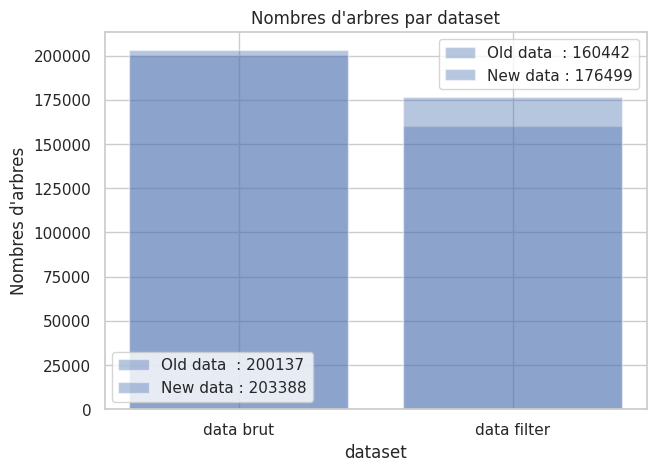

In [ ]:

fig, axes = plt.subplots(figsize=(7,5), dpi=100)

plt.title("Nombres d'arbres par dataset")

for d_brut in liste_data_brut:
  plt.bar(x="data brut", height=d_brut, color="b", width=0.8,  alpha=0.4,  linewidth=1)

for d_filter in liste_data_filter:
  plt.bar(x="data filter", height=d_filter, color="b", width=0.8,  alpha=0.4,  linewidth=1)

legends1 = plt.legend(["Old data  : " + str(len(df)), "New data : " + str(len(test_df))], loc=3)
legend = plt.legend(["Old data  : " + str(len(data)), "New data : " + str(len(test_data))], loc=1)

plt.gca().add_artist(legends1)
plt.xlabel("dataset")
plt.ylabel("Nombres d'arbres")
plt.savefig("bar_chart_compare_two_dataset.png")


# Création de liste sur la dominialite des arbres
### Afin de creer un petit camenbert des 5 plus conséquentes dominialite
 
  - liste du plus petit au plus grand
  - liste du nombre d'arbres par dominialite  

In [ ]:
pie_chart_five_sort_dominialite = []
pie_chart_five_nombre_arbres_per_dominialite = []
i = 0
for dominialite_nom_et_nbr_arbres in count_tree_by_domanialite_sort.items():
  if i == 5:
    break
  pie_chart_five_sort_dominialite.append(dominialite_nom_et_nbr_arbres[0])
  pie_chart_five_nombre_arbres_per_dominialite.append(dominialite_nom_et_nbr_arbres[1])
  i+=1

# Création d'un cambert ( pie chart ) 
### représentant le nombres d'arbres dans leur differentes dominialite 

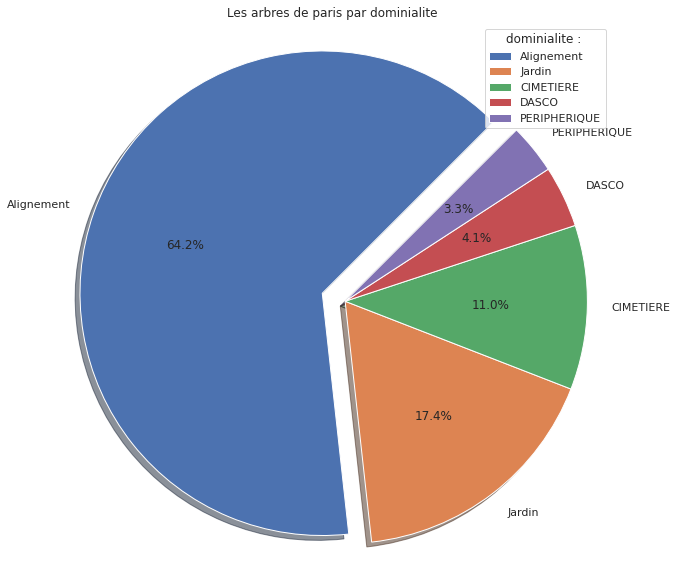

In [ ]:
labels = pie_chart_five_sort_dominialite
sizes = pie_chart_five_nombre_arbres_per_dominialite

explode = (0.1, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots(figsize = (10, 10))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)

ax1.axis('equal')

plt.title("Les arbres de paris par dominialite")

plt.legend(pie_chart_five_sort_dominialite, title = "dominialite : ")
plt.savefig("Pie_chart_of_tree_dominialite.png")


# Création histogrames utilisation 
### representant les 2 tiers des arbres de paris sous ces éspeces

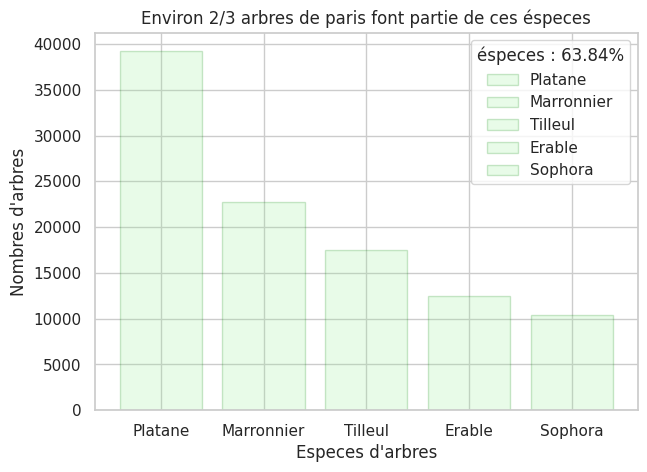

In [ ]:
fig, axes = plt.subplots(figsize=(7,5), dpi=100)

for genre in tree_count_by_genre_sort.items():
  plt.bar(genre[0], height=genre[1], edgecolor="green", color="lightgreen", alpha=0.2,  linewidth=1)

plt.xlabel("Especes d'arbres")
plt.ylabel("Nombres d'arbres")

plt.title("Environ 2/3 arbres de paris font partie de ces éspeces")

plt.legend(tree_count_by_genre_sort.keys(), title = "éspeces : "  + str(average_arbres_genres)+"%")

plt.savefig("bar_chart_of_espece_tree.png")

# Création de liste 
### pour afficher sur la map le nombre d'arbres par genres
 - *initialisation d'une liste vide* **list_genre_par_arrd**
 - *Boucle tout les arrondissement une fois* **arrdt**
    - *initialisation variable d'incrementation* **y**
    - *initialisation string vide* **string_genre_nombre**
    - *Boucle sur tout les genres par arrondissement* **genre**
      - *Concatenation html du genre et le nombre d'arbres de ce genre dans cet arrondissement* **string_genre_nombre**
      - *Incrémentation de la variable* **y** 
    - *Sortie de la deuxieme boucle*
    - *on ajoute le genre et le nombre d'abres du même genre par arrondissement dans la list* **list_genre_par_arrd**




In [ ]:
list_genre_par_arrd = []
for arrdt in unique_arrdt:
  y = 0
  string_genre_nombre = ""
  for genre in tree_count_by_arrdt_and_genre[arrdt].keys():
    string_genre_nombre += "<p style='font-size:12px;'>"+ genre +" : " + str(tree_count_by_arrdt_and_genre[arrdt][genre]) + "</p>"
    y += 1
  list_genre_par_arrd.append(string_genre_nombre)
 

# Création de nouveau dictionnaire arrondissement, nombre_arbres, coordonée

### Afficher le nombres d'arbres par arrondissement

 - Utilisation de la fonction groupby plus nth(0) qui nous mets en groupes les arrondissement et nth qui nous récupere une ligne
 - *Initialisation d'une variable d'incrementation* **i**
 - *Initialisation dictionnaire* **dict_arr_nbr_arbres** 
 - *Boucle sur les tout les arrondissement* **arr**
  - *si la taille de la liste est égal à 25 stop*
  - *Initialisation d'une variable d'incrementation* **a**
  - *Initialisation d'une variable d'incrementation* **b**
  -  Boucle sur les column et les position a, b
    - si column == geo_point_a & geo_point_b
    - si on a les deux geo_point a & b alors on update le dictionnaire avec l'arrondissement le nombre d'arbres par arrondissement et la position



In [ ]:
first_of_each_district = data.groupby('arrondissement').nth(0)
i = 0
dict_arr_nbr_arbres = {}
for arr in unique_arrdt:
  if len(dict_arr_nbr_arbres) == 25:
      break
  a = 0
  b = 0
  for column in first_of_each_district:
    if column == "geo_point_2d_a":
      geo_point_a = first_of_each_district[column][arr]
      a += 1

    if column == "geo_point_2d_b":
      geo_point_b = first_of_each_district[column][arr]  
      b += 1

    if a == 1 & b == 1:
      dict_arr_nbr_arbres.update({arr : {count_tree_by_arrdt[arr] : (geo_point_a, geo_point_b)}})
    i +=1


# Création de la map sur lequel nous allons afficher nos données traitées
1 : Utilisation de la librairies **folium** et de ça fonction **map** 
param
 - localiser le point départ sur la carte du monde dans notres cas latitute et longitude de Paris
 - zoom_start pour zoomé sur la carte
 - tiles pour avoir un style différents de la vision de la terre

In [ ]:
map = folium.Map(
    location=[48.8534, 2.3488],
    zoom_start=12,
    tiles='Stamen Terrain'
)

2 : Mise en place de mes données sur la map
  - *Initialisation de la variable d'incrémentation* **i**
  - *Boucle sur tout éléments du dict* **dict_key_value**
    - *Boucle sur toute les positions de mon dict* **dict_tuple_pos**
      - *Création HTML avec variable arrondissement + nombre d'abres present + genre et nombre d'abres par genre*
      - *incrémentation de la variable* **i**
      - *iFrame c'est la fênetre html qui s'affiche*
      - *popup ce qui va s'afficher dans le iFrame*
      - *folium.Circle pour le marker en cercle sur la map*

Pour finir sauvegarder la map a map.html


In [ ]:
i = 0      

for dict_key_value in dict_arr_nbr_arbres.items():  
  
  for dict_tuple_pos in dict_key_value[1].items():
      
      html = '<h4>'+ str(dict_key_value[0]) +'</h4><h5>' + str(dict_tuple_pos[0]) + ' Arbres présent :</b></h5><p style="font-size:13px">Les différentes éspeces d\'arbres</p>'+ list_genre_par_arrd[i]
      
      i += 1
      
      iframe = folium.IFrame(html, width=200, height=200)
      
      popup = folium.Popup(iframe, max_width=5500)
      
      folium.Circle(location=[dict_tuple_pos[1][0], dict_tuple_pos[1][1]],
                    radius=350,
                    popup=popup, 
                    line_color='#3186cc',
                    fill_color='#3186cc',
                    fillOpacity= 0.8
                    ).add_to(map)

map.save('carte_espece_arbre_par_arrdt.html')

# Création histogramme
### representant le nombres d'arbres par arrondissement


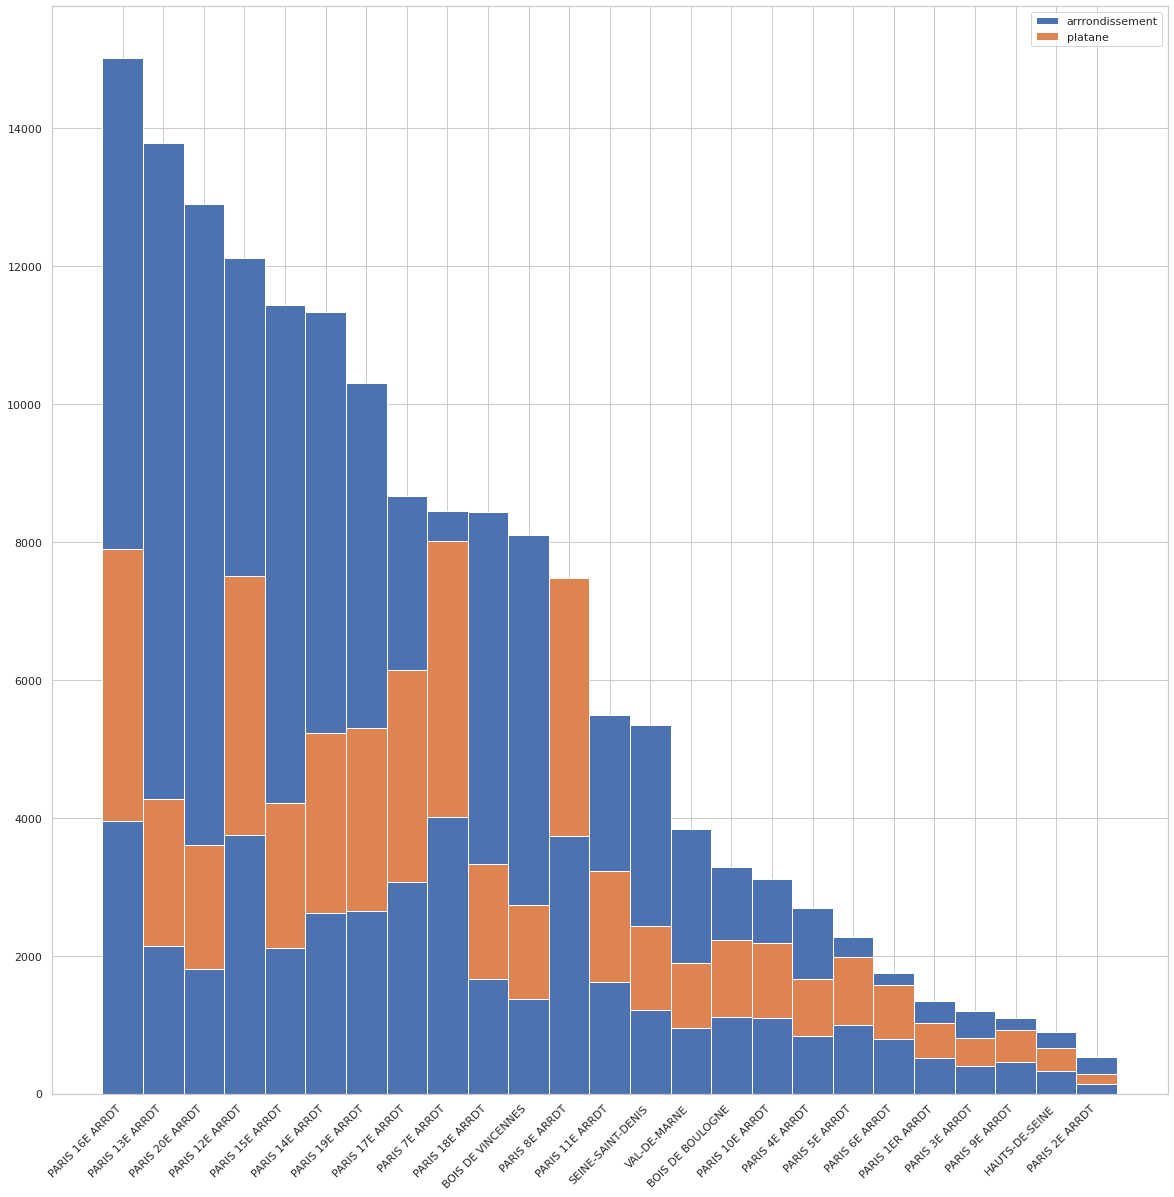

In [ ]:
data_sort_arrdt = count_tree_by_arrdt.sort_values(ascending=False)

genre_par_arrdt_sort = data.pivot_table(index = ['arrondissement', 'libelle_francais'], aggfunc="size")

test_sortie = genre_par_arrdt_sort.sort_values(ascending=False)

arrdt_unique = list(data_sort_arrdt.keys())

fig,ax = plt.subplots(figsize=(20,20))

arbres_per_arrdt = list(data_sort_arrdt.values)

plt.bar(arrdt_unique, arbres_per_arrdt, width=1, label="arrrondissement")

liste_genre_per_nombre = []
liste_nombre_per_genre = []
i = 0
for arrdt in data_sort_arrdt.keys():
  if i == 25:
    break

  y = 0
  for index, items in test_sortie.items():
    
    if y == 1:
      break

    if arrdt == index[0]:
      liste_genre_per_nombre.append(index[1])
      liste_nombre_per_genre.append(items)
      y += 1

  i +=1
plt.bar(arrdt_unique, liste_nombre_per_genre, bottom=liste_nombre_per_genre, width=1, label="platane")

ax.set_xticklabels(arrdt_unique, rotation=45, ha='right')

plt.legend()